<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/NTLK_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%ED%8C%A8%ED%82%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 말뭉치**

In [4]:
import pandas as pd


In [61]:
#말뭉치 다운
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

In [15]:
#gutenberg 말뭉치에는 있는 샘플 작품들
nltk.corpus.gutenberg.fileids()

emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [27]:
seventeen=open('seventeen.txt', encoding='UTF-8').read()
print(seventeen[:200])

파이팅 해야지
파이팅
아뿔싸 일어나야지 아침인데
눈 감았다 뜨니 해가 중천인데
아침밥은 Pass 10분 더 자야 돼 Oh
Take-out coffee로 (아메 아메 아메 아메)
Story 속에 (친구들은 다 왜)
잘나 보여 (왜 나 나 나만 왜)
또 또 또 또 왜 아등바등 또 왜
이리저리 치여 왜 (I9 I9 I9 I9)
우린 다 이어폰 꽂은 Zombie



# **2. 토큰 생성**

- 토큰: 작은 문자열 단위
- tokenizing: 문자열을 토큰으로 나누는 작업
- sent_tokenize(), word_tokenize(), RegexpTokenizer(없앨거).tokenize(변수)

In [26]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [17]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [56]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

### **혼자연습**

In [ ]:
seventeen[10:300]

In [ ]:
sent_tokenize(seventeen[10:300])

In [ ]:
print('<0> \n',sent_tokenize(emma_raw[:1000])[0] )
print('<1> \n',sent_tokenize(emma_raw[:1000])[1], '\n')
print('<2> \n',sent_tokenize(emma_raw[:1000])[2], '\n')
print('<3> \n',sent_tokenize(emma_raw[:1000])[3], '\n')

sent_tokenize(emma_raw[:1000])


In [44]:
sent_tokenize(emma_raw[:1000])[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [55]:
sent_tokenize(seventeen[:300])

["파이팅 해야지\n파이팅\n아뿔싸 일어나야지 아침인데\n눈 감았다 뜨니 해가 중천인데\n아침밥은 Pass 10분 더 자야 돼 Oh\nTake-out coffee로 (아메 아메 아메 아메)\nStory 속에 (친구들은 다 왜)\n잘나 보여 (왜 나 나 나만 왜)\n또 또 또 또 왜 아등바등 또 왜\n이리저리 치여 왜 (I9 I9 I9 I9)\n우린 다 이어폰 꽂은 Zombie\n필요해 모두 다 텐션 Up pumpin'\n힘을 좀 내어보자\n우린 여러분의 부석순\n반복되는 하루에\n시작이 되는 이 노래\n네 옆에서 불러주겠어\n힘내야지 뭐 어쩌겠어\n파이팅 해야지 파이"]

In [28]:
word_tokenize(seventeen[10:30])

['팅', '아뿔싸', '일어나야지', '아침인데', '눈', '감']

# **3. 형태소분석**

어간 추출(stemming) : 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법

원형 복원(lemmatizing) : 같은 의미를 가지는 여러 단어를 사전형으로 통일

품사 부착(Part-Of-Speech tagging)

In [59]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [ ]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

# **4. 품사 부착**

NNP: 단수 고유명사

VB: 동사

VBP: 동사 현재형

TO: to 전치사

NN: 명사(단수형 혹은 집합형)

DT: 관형사

In [ ]:
nltk.help.upenn_tagset("VB")

In [62]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [63]:
#명사인 토큰만 선택
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [64]:
#태그 튜플을 제거
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

# **5. Text  클래스**

- 시각화 dispersion_plot()
- 문맥보기 concordance("단어")
- 비슷한단어 similar("Emma")
- 두단어의공통문맥 common_contexts(["",""])

In [ ]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))

In [ ]:
text.plot(20)
plt.show()

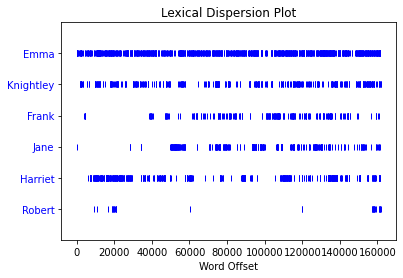

In [67]:
#단어가 사용된 위치를 시각화
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [68]:
#단어가 사용된 위치를 직접 표시해서 문맥보기(해당 단어의 앞과 뒤에 사용된 단어를 뜻함)
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [69]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾기
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [70]:
#두 단어의 공통 문맥을 보기
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


# **6. FreqDist**

문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스

In [ ]:
fd = text.vocab()
type(fd)

In [ ]:
from nltk import FreqDist

#품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [ ]:
#전체 단어의 수, “Emma”라는 단어의 출현 횟수, 확률을 각각 계산
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

In [ ]:
#가장 출현 횟수가 높은 단어
fd_names.most_common(5)

# **7. 워드클라우드**

단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()